Aluno: Mathews Edwirds <br>
Matrícula: 201765503ab <br>

### 1) Um servidor Web tem uma CPU e um disco e foi monitorado durante uma hora. Durante este período, a utilização da CPU foi de 30% e 10800 requisições HTTP foram processadas. Cada requisição requer em média 3 operações de I/O. O tempo médio de serviço no disco é de 20mseg.

Faça (mostre o desenvolvimento):

a) Quais a demandas na CPU e no disco de uma requisição HTTP típica? <br>
b) Qual o tempo de resposta médio? <br>
c) Quantas requisições em média competem por CPU? <br>

Esse é mais chatinho… <br>
d) Assuma que no máximo n requisições HTTP podem estar em execução no servidor Web em um dado instante. Requisições que chega e encontram n requisições já em processamento serão colocadas em uma fila de processamento, que, assume-se, tem tamanho infinito. Grafe o throughput e o tempo de execução de uma requisição típica em função de n, para n = 1, 2, 3, ...., 10...


###### a) Quais a demandas na CPU e no disco de uma requisição HTTP típica?
Dados:

Tempo: 1 hora <br>
Utilização de CPU: 30% <br>
Total de requisições: 10800 <br>
Média de operações de I/O por requisição: 3 <br>
Tempo de serviço do disco: 20mseg <br>

Referências: 

https://edisciplinas.usp.br/pluginfile.php/4140018/mod_resource/content/1/11aula%20-%20ResolucaoAnalitica.pdf <br>
http://www.dsc.ufcg.edu.br/~reinaldo/adsd_files/ANALISE_OPERACIONAL_6slides.pdf <br>
https://homepages.dcc.ufmg.br/~jussara/anamodes/aula3-2014.pdf <br>

In [1]:
print("CPU:")
#Vamos começar encontrando o número de transações por segundo:
CPU_TotalRequisicoes = 10800                            #Em uma hora
CPU_TransacoesSegundo = CPU_TotalRequisicoes/3600       #Transações por segundo
print("Taxa média de processamento na CPU: {} transações / seg".format(CPU_TransacoesSegundo))

#Assim, encontramos a demanda de serviço no CPU:
CPU_Utilizacao = 0.30  #%
CPU_Demanda = CPU_Utilizacao / CPU_TransacoesSegundo
print("Utilização da CPU: {}%".format(CPU_Utilizacao*100))
print("Demanda da CPU: {}seg ({}ms)".format(round(CPU_Demanda,4),round(CPU_Demanda,4)*1000))

print("\nDisco:")
#Vamos começar encontrando o número de transações por segundo
Disco_TotalRequisicoes = 10800                              #Em uma hora
Disco_TransacoesSegundo = Disco_TotalRequisicoes/3600       #Transações por segundo
print("Taxa média de processamento no disco: {} transações / seg".format(Disco_TransacoesSegundo))

#Agora vamos calcular a taxa média de processamento no disco (em segundos)
Disco_MediaOperacoesIO = 3
Disco_OperacoesSegundo = Disco_TransacoesSegundo * Disco_MediaOperacoesIO
print("Operações de I/O por segundo no disco: {} operações de I/O /segundo".format(Disco_OperacoesSegundo))

# Considerando o tempo de serviço como 20mseg
Disco_TempoServico = 0.02
Disco_Utilizacao = Disco_OperacoesSegundo * Disco_TempoServico * 100
print("Utilização do disco: {}%".format(Disco_Utilizacao))

#Por fim, encontramos a demanda de serviço no disco:
Disco_Demanda = Disco_MediaOperacoesIO * Disco_TempoServico
print("Demanda do disco: {}seg ({}ms)".format(Disco_Demanda,Disco_Demanda*1000))

CPU:
Taxa média de processamento na CPU: 3.0 transações / seg
Utilização da CPU: 30.0%
Demanda da CPU: 0.1seg (100.0ms)

Disco:
Taxa média de processamento no disco: 3.0 transações / seg
Operações de I/O por segundo no disco: 9.0 operações de I/O /segundo
Utilização do disco: 18.0%
Demanda do disco: 0.06seg (60.0ms)


###### b) Qual o tempo de resposta médio?

In [2]:
# O tempo de resposta médio, nesse caso, é a média de operações de I/O por requisição dividido pelo 
# num. de transações por segundo do sistema
MediaOperacoesIO = 3
TransacoesSegundo = 10800/3600       #Transações por segundo
TempoRespostaMédio = MediaOperacoesIO/TransacoesSegundo

print("Tempo de resposta médio: {} segundo".format(TempoRespostaMédio))

Tempo de resposta médio: 1.0 segundo


###### c) Quantas requisições em média competem por CPU?

In [3]:
CPU_Utilizacao = 0.30
TotalRequisicoes = 10800  
CPU_RequisicoesMedias = int(CPU_Utilizacao * TotalRequisicoes)
print("Aproximadamente {} requisições ({}% de {}) competem por CPU.".format(CPU_RequisicoesMedias, CPU_Utilizacao*100, TotalRequisicoes))

Aproximadamente 3240 requisições (30.0% de 10800) competem por CPU.


###### d) Assuma que no máximo n requisições HTTP podem estar em execução no servidor Web em um dado instante. As Requisições que chegam e encontram n requisições já em processamento serão colocadas em uma fila de processamento, que, assume-se, tem tamanho infinito. Grafe o throughput e o tempo de execução de uma requisição típica em função de n, para n = 1, 2, 3, ...., 10...

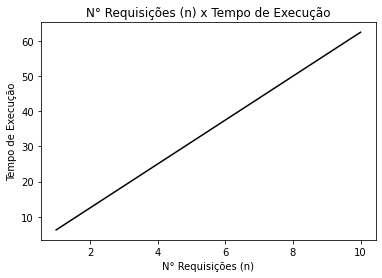

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

TotalDemandas = Disco_Demanda + CPU_Demanda
throu, execucao = [], []

for n in range(1, 10 + 1):
    TempoExecucao = n / TotalDemandas#TransacoesSegundo
    throu.append(n)
    execucao.append(TempoExecucao)

plt.plot(throu, execucao, color='black');
plt.xlabel("N° Requisições (n)");
plt.ylabel("Tempo de Execução");
plt.title("N° Requisições (n) x Tempo de Execução");

#### 2) Seja um consultório psiquiátrico com as seguintes características: 

a) somente 60% dos pacientes em potencial que ligam para o consultório conseguem falar diretamente com um especialista (os outros 40% deixam o telefone de contato).  <br>
b) 75% das vezes um especialista é capaz de retornar a ligação no mesmo dia enquanto que nas demais vezes o contato é feito no dia seguinte. <br>
c) a experiência na clínica indica que a probabilidade de um paciente marcar a consulta é de 0.8 se ele conseguiu falar imediatamente com o especialista, e é de 0.6 e 0.4, respectivamente, se a sua ligação foi retornada no mesmo dia ou no dia seguinte.

###### Pergunta 1) Qual a porcentagem de pessoas que telefonam que marcam consulta?

Vamos considerar que num dia, 100 clientes ligaram para o consultório e que quando um cliente deixa o telefone, um especialista consegue retornar a ligação no mesmo dia 75% das vezes.

Desses clientes, temos que:
* 60 clientes falaram com um especialista no telefone <br>
* 40 clientes deixaram o telefone, sendo que:
   * 30 receberam retorno no mesmo dia
   * 10 receberam retorno no dia seguinte
   
Devemos agora considerar que as probabilidades para um cliente realmente marcar a consulta são:
* 80% quando atendido diretamente por um especialista
* 60% quando a ligação é retornada no mesmo dia
* 40% quando a ligação é retornada no dia seguinte

Dessa forma, podemos calcular o número de clientes que marcaram consulta em cada caso:
* Dos 60 clientes que falaram com um especialista no telefone, 48 marcaram consulta.
* Dos 30 clientes que deixaram o telefone e que foram retornados no mesmo dia, 18 marcaram consulta.
* Dos 10 clientes que deixaram o telefone e que foram retornados no dia seguinte, 4 marcaram consulta.

Somando, descobrimos que 70 clientes marcaram consulta. O que corresponde a 70% do total de clientes que ligaram para a clínica.

###### Pergunta 2) Qual a porcentagem das pessoas que marcam consulta que só tiveram sua ligação retornada no dia seguinte?

Probabilidade de marcar consulta: 0.7
Probabilidade do contato ser feito no dia seguinte: 0.25
Probabilidade de marcar consulta se a pessoa só teve a ligação retornada no dia seguinte: 0.4

Agora, utilizando o teorema de Bayes:

$P (\frac{DS}{MC}) = \frac{P(\frac{MC}{DS}) * P(DS)}{P(MC)} = \frac{0.4 * (0.25 * 0.4)}{0.7} = 5.71$% 

Por fim encontramos que 5.71% é a porcentagem das pessoas que marcam consulta que só tiveram sua ligação retornada no dia seguinte.